In [1]:
import pandas as pd
import numpy as np

In [2]:
comp=pd.read_csv('companies.txt',sep='\t',encoding='ansi')

In [3]:
comp.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [4]:
com=[]
for i in range(len(comp)):
    com.append(comp['permalink'][i].split('/')[2])


In [5]:
comp['company_name']=com

In [6]:
comp.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_name
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,-Fame
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,-Qounter
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,-The-One-Of-Them-Inc-
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,0-6-Com
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,004-Technologies


In [7]:
comp['company_name'].nunique()

66368

In [8]:
rounds=pd.read_csv('rounds2.csv',encoding='ansi')

In [9]:
com1=[]
for i in range(len(rounds)):
    com1.append(rounds['company_permalink'][i].split('/')[2])

In [10]:
rounds['company_name']=com1

In [11]:
rounds['company_name'].nunique()

90245

In [12]:
comp['company_name']=comp['company_name'].str.lower().str.strip()
rounds['company_name']=rounds['company_name'].str.lower().str.strip()
print(comp['company_name'].nunique())
print(rounds['company_name'].nunique())

66368
66368


In [13]:
common_comp=set(comp['company_name']).intersection(set(rounds['company_name']))
len(common_comp)

66368

In [14]:
common_comp=set(comp['company_name']).difference(set(rounds['company_name']))
len(common_comp)

0

In [15]:
comp.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_name
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,-fame
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,-qounter
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,-the-one-of-them-inc-
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,0-6-com
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,004-technologies


In [16]:
rounds.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,company_name
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,-fame
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,-qounter
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,-qounter
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,-the-one-of-them-inc-
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,0-6-com


In [17]:
merge_data=pd.merge(comp,rounds,on='company_name',how='inner')

In [18]:
len(merge_data)

114949

In [19]:
rounds['company_name'].value_counts()

solarflare                      19
semprius                        18
quellan                         18
exagen-diagnostics              18
endogastric-solutions           17
vocalocity                      17
tigo-energy                     17
terascala                       16
palantir-technologies           16
tyro-payments                   16
mobivery                        16
powerhouse-dynamics             16
fresenius-medical-care          16
next-step-living                15
rostima                         15
growlife                        15
aperto-networks                 15
instamed                        15
cns-response                    15
docusign                        14
solarcity                       14
covenant-surgical-partners      14
bramasol                        14
aviir                           14
bti-systems                     14
seventh-sense-biosystems        13
intransa                        13
uber                            13
visualant           

In [20]:
merge_data['funding_round_type'].value_counts()

venture                  55494
seed                     30524
debt_financing            6895
angel                     6094
undisclosed               4897
equity_crowdfunding       3257
private_equity            2285
grant                     2200
convertible_note          1817
post_ipo_equity            638
product_crowdfunding       410
non_equity_assistance      191
post_ipo_debt              152
secondary_market            95
Name: funding_round_type, dtype: int64

In [21]:
merge_data.groupby(['funding_round_type'])['raised_amount_usd'].describe()

,count,mean,std,min,25%,50%,75%,max
funding_round_type,,,,,,,,
angel,4860.0,9.586945e+05,7.404397e+06,0.0,150000.00,400000.0,1000000.0,4.945120e+08
convertible_note,1447.0,1.453439e+06,8.043846e+06,0.0,78847.50,272000.0,1000000.0,1.850483e+08
debt_financing,6682.0,1.704353e+07,2.803204e+08,0.0,330484.25,1100000.0,4000000.0,2.127194e+10
equity_crowdfunding,1228.0,5.383682e+05,1.719329e+06,0.0,7000.00,100000.0,395901.0,2.740000e+07
grant,2124.0,4.300576e+06,2.558742e+07,0.0,50000.00,201684.0,1700000.0,7.500000e+08
non_equity_assistance,73.0,4.112031e+05,1.771747e+06,0.0,25000.00,60000.0,125000.0,1.500000e+07
post_ipo_debt,152.0,1.687046e+08,6.024738e+08,70000.0,4000000.00,19950000.0,60000000.0,5.800000e+09
post_ipo_equity,628.0,8.218249e+07,4.691889e+08,77.0,3764794.00,12262852.5,40000000.0,1.066494e+10
private_equity,1936.0,7.330859e+07,1.981135e+08,0.0,5000000.00,20000000.0,75000000.0,4.745460e+09


In [22]:
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

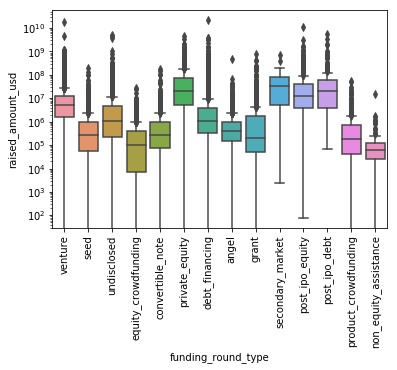

In [23]:
sb.boxplot(x='funding_round_type',y='raised_amount_usd',data=merge_data)
plt.yscale('log')
plt.xticks(rotation=90)

In [24]:
merge_data_venture=merge_data[merge_data['funding_round_type']=='venture']

In [25]:
top_country_data=merge_data_venture[(merge_data_venture['country_code']=='USA') | (merge_data_venture['country_code']=='IND') | (merge_data_venture['country_code']=='GBR')]

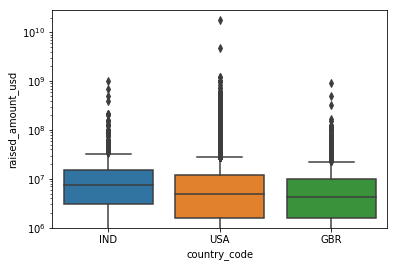

In [26]:
sb.boxplot(x='country_code',y='raised_amount_usd',data=top_country_data)
plt.yscale('log')

In [27]:
merge_data.head(10)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_name,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,-fame,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,-qounter,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,-qounter,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,-the-one-of-them-inc-,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,0-6-com,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
5,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,004-technologies,/ORGANIZATION/004-TECHNOLOGIES,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN
6,/Organization/01Games-Technology,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN,01games-technology,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,41250.0
7,/Organization/0Ndine-Biomedical-Inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,0ndine-biomedical-inc,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11-09-2009,43360.0
8,/Organization/0Ndine-Biomedical-Inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,0ndine-biomedical-inc,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0
9,/Organization/0Xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,0xdata,/ORGANIZATION/0XDATA,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,NaN,22-05-2013,3000000.0


In [28]:
mapp=pd.read_csv('mapping.csv')

In [29]:
mapp=mapp.set_index('category_list')

In [30]:
for i in mapp.columns:
    mapp[mapp[i]==1]=i
    

In [31]:
mapp=mapp.reset_index()

In [32]:
mapp.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,Blanks,Blanks,Blanks,Blanks,Blanks,Blanks,Blanks,Blanks,Blanks
1,3D,Manufacturing,Manufacturing,Manufacturing,Manufacturing,Manufacturing,Manufacturing,Manufacturing,Manufacturing,Manufacturing
2,3D Printing,Manufacturing,Manufacturing,Manufacturing,Manufacturing,Manufacturing,Manufacturing,Manufacturing,Manufacturing,Manufacturing
3,3D Technology,Manufacturing,Manufacturing,Manufacturing,Manufacturing,Manufacturing,Manufacturing,Manufacturing,Manufacturing,Manufacturing
4,Accounting,"Social, Finance, Analytics, Advertising","Social, Finance, Analytics, Advertising","Social, Finance, Analytics, Advertising","Social, Finance, Analytics, Advertising","Social, Finance, Analytics, Advertising","Social, Finance, Analytics, Advertising","Social, Finance, Analytics, Advertising","Social, Finance, Analytics, Advertising","Social, Finance, Analytics, Advertising"


In [33]:
#mapp['category_list']=mapp['category_list'].fillna('Blanks')

In [34]:
mapp=mapp.iloc[:,:2]

In [35]:
mapp=mapp.rename(columns={'Automotive & Sports':'category'})

In [36]:
mapp

,category_list,category
0,NaN,Blanks
1,3D,Manufacturing
2,3D Printing,Manufacturing
3,3D Technology,Manufacturing
4,Accounting,"Social, Finance, Analytics, Advertising"
5,Active Lifestyle,Health
6,Ad Targeting,"Social, Finance, Analytics, Advertising"
7,Advanced Materials,Manufacturing
8,Adventure Travel,Automotive & Sports
9,Advertising,"Social, Finance, Analytics, Advertising"


In [37]:
final_data=pd.merge(top_country_data,mapp,on='category_list',how='inner')

In [38]:
final_data.head(20)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_name,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,category
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,-fame,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,Entertainment
1,/Organization/All-Def-Digital,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,all-def-digital,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.0,Entertainment
2,/Organization/Genius-Monkey,Genius Monkey,http://geniusmonkey.com,Media,operating,USA,AZ,Phoenix,Tempe,NaN,genius-monkey,/organization/genius-monkey,/funding-round/6651af18e8cec80b5df168d2e28cecb2,venture,NaN,17-03-2015,2000000.0,Entertainment
3,/Organization/Glass-Media,Glass Media,http://www.glass-media.com,Media,closed,USA,TX,Dallas,Dallas,01-01-2012,glass-media,/ORGANIZATION/GLASS-MEDIA,/funding-round/cb7074009f3bd0becbebcdf08ed63a4e,venture,NaN,01-04-2015,30000.0,Entertainment
4,/Organization/Marine-Construction-Technologies,Marine Construction Technologies,http://marinecontech.org/,Media,operating,USA,WA,Seattle,Seattle,01-01-2012,marine-construction-technologies,/ORGANIZATION/MARINE-CONSTRUCTION-TECHNOLOGIES,/funding-round/9a549453415fd1711a34f51c9abca9e3,venture,NaN,17-04-2015,125000.0,Entertainment
5,/Organization/Media-Group-Of-America,Media Group of America,http://mgofa.com,Media,operating,USA,DC,"Washington, D.C.",Washington,01-01-2013,media-group-of-america,/ORGANIZATION/MEDIA-GROUP-OF-AMERICA,/funding-round/048d7be2b85a3b017177b4d9b0f25faf,venture,NaN,07-01-2015,1500000.0,Entertainment
6,/Organization/Stack-Media,STACK Media,http://www.stack.com/,Media,operating,USA,OH,Cleveland,Cleveland,01-01-2005,stack-media,/organization/stack-media,/funding-round/374fee562ac1ea37bafef0876971347b,venture,A,15-05-2008,250000.0,Entertainment
7,/Organization/Stream-Tv-Networks,Stream TV Networks,http://www.streamtvnetworks.com,Media,operating,USA,PA,Philadelphia,Philadelphia,NaN,stream-tv-networks,/organization/stream-tv-networks,/funding-round/4efd31e3570875d2ca96e1f17167beb9,venture,NaN,23-06-2014,1213000.0,Entertainment
8,/Organization/Stream-Tv-Networks,Stream TV Networks,http://www.streamtvnetworks.com,Media,operating,USA,PA,Philadelphia,Philadelphia,NaN,stream-tv-networks,/ORGANIZATION/STREAM-TV-NETWORKS,/funding-round/85e64a519362d51333b4d99234df9e4d,venture,NaN,07-10-2014,1500000.0,Entertainment
9,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,004-technologies,/ORGANIZATION/004-TECHNOLOGIES,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN,Others
